In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [32]:
df=pd.read_csv("Cleaned_ZOMATO1.csv")

In [33]:
df.head()

Unnamed: 0      ID Delivery_person_ID  Delivery_person_Age  \
0           1  0xd987      KOCRES16DEL01                 21.0   
1           2  0x2784     PUNERES13DEL03                 23.0   
2           3  0xc8b6     LUDHRES15DEL02                 34.0   
3           4  0xdb64      KNPRES14DEL02                 24.0   
4           5  0x3af3      MUMRES15DEL03                 29.0   

   Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
0                      4.7            10.003064             76.307589   
1                      4.7            18.562450             73.916619   
2                      4.3            30.899584             75.809346   
3                      4.7            26.463504             80.372929   
4                      4.5            19.176269             72.836721   

   Delivery_location_latitude  Delivery_location_longitude  Order_Date  ...  \
0                   10.043064                    76.347589  13-02-2022  ...   
1                   18.652450                    74.006619  04-03-2022  ...   
2                   30.919584                    75.829346  13-02-2022  ...   
3                   26.593504                    80.502929  14-02-2022  ...   
4                   19.266269                    72.926721  02-04-2022  ...   

  Time_Order_picked Weather_conditions Road_traffic_density Vehicle_condition  \
0             15:05             Stormy                 High                 1   
1             17:40         Sandstorms               Medium                 1   
2             09:30         Sandstorms                  Low                 0   
3             20:05                Fog                  Jam                 1   
4             20:35         Sandstorms                  Jam                 2   

   Type_of_order   Type_of_vehicle multiple_deliveries  Festival  \
0           Meal        motorcycle                 1.0        No   
1         Drinks           scooter                 1.0        No   
2         Buffet        motorcycle                 0.0        No   
3          Snack           scooter                 1.0        No   
4         Buffet  electric_scooter                 1.0        No   

            City Time_taken (min)  
0  Metropolitian               23  
1  Metropolitian               21  
2  Metropolitian               20  
3  Metropolitian               41  
4  Metropolitian               20  

[5 rows x 21 columns]

In [34]:
df.shape

(33765, 21)

In [35]:
for col in df.columns:
    print(col)

Unnamed: 0
ID
Delivery_person_ID
Delivery_person_Age
Delivery_person_Ratings
Restaurant_latitude
Restaurant_longitude
Delivery_location_latitude
Delivery_location_longitude
Order_Date
Time_Orderd
Time_Order_picked
Weather_conditions
Road_traffic_density
Vehicle_condition
Type_of_order
Type_of_vehicle
multiple_deliveries
Festival
City
Time_taken (min)


In [36]:
df=df[['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)']]
df.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  0xd987      KOCRES16DEL01                 21.0                      4.7   
1  0x2784     PUNERES13DEL03                 23.0                      4.7   
2  0xc8b6     LUDHRES15DEL02                 34.0                      4.3   
3  0xdb64      KNPRES14DEL02                 24.0                      4.7   
4  0x3af3      MUMRES15DEL03                 29.0                      4.5   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            10.003064             76.307589                   10.043064   
1            18.562450             73.916619                   18.652450   
2            30.899584             75.809346                   30.919584   
3            26.463504             80.372929                   26.593504   
4            19.176269             72.836721                   19.266269   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                    76.347589  13-02-2022       14:55             15:05   
1                    74.006619  04-03-2022       17:30             17:40   
2                    75.829346  13-02-2022       09:20             09:30   
3                    80.502929  14-02-2022       19:50             20:05   
4                    72.926721  02-04-2022       20:25             20:35   

  Weather_conditions Road_traffic_density  Vehicle_condition Type_of_order  \
0             Stormy                 High                  1          Meal   
1         Sandstorms               Medium                  1        Drinks   
2         Sandstorms                  Low                  0        Buffet   
3                Fog                  Jam                  1         Snack   
4         Sandstorms                  Jam                  2        Buffet   

    Type_of_vehicle  multiple_deliveries Festival           City  \
0        motorcycle                  1.0       No  Metropolitian   
1           scooter                  1.0       No  Metropolitian   
2        motorcycle                  0.0       No  Metropolitian   
3           scooter                  1.0       No  Metropolitian   
4  electric_scooter                  1.0       No  Metropolitian   

   Time_taken (min)  
0                23  
1                21  
2                20  
3                41  
4                20

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33765 entries, 0 to 33764
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           33765 non-null  object 
 1   Delivery_person_ID           33765 non-null  object 
 2   Delivery_person_Age          33765 non-null  float64
 3   Delivery_person_Ratings      33765 non-null  float64
 4   Restaurant_latitude          33765 non-null  float64
 5   Restaurant_longitude         33765 non-null  float64
 6   Delivery_location_latitude   33765 non-null  float64
 7   Delivery_location_longitude  33765 non-null  float64
 8   Order_Date                   33765 non-null  object 
 9   Time_Orderd                  33765 non-null  object 
 10  Time_Order_picked            33765 non-null  object 
 11  Weather_conditions           33765 non-null  object 
 12  Road_traffic_density         33765 non-null  object 
 13  Vehicle_conditio

This output is from df.info(), showing details about a DataFrame:

The DataFrame has 33765 entries with 20 columns.
Each column is listed with its name, non-null count, and data type (Dtype).
The memory usage of the DataFrame is also displayed, which is approximately 5.2+ MB.
It provides information about the data types of columns (object, float64, int64).
Additionally, it shows the count of non-null values in each column.

# EDA 

In [38]:
df.describe().T

count       mean       std        min  \
Delivery_person_Age          33765.0  29.264327  5.643267  20.000000   
Delivery_person_Ratings      33765.0   4.724934  0.175827   4.300000   
Restaurant_latitude          33765.0  18.571933  5.513660   9.957144   
Restaurant_longitude         33765.0  76.242596  2.542165  72.768726   
Delivery_location_latitude   33765.0  18.633826  5.515128   9.967144   
Delivery_location_longitude  33765.0  76.304489  2.541214  72.778726   
Vehicle_condition            33765.0   1.042944  0.824697   0.000000   
multiple_deliveries          33765.0   0.708929  0.522488   0.000000   
Time_taken (min)             33765.0  24.837791  8.702617  10.000000   

                                   25%        50%        75%        max  
Delivery_person_Age          24.000000  29.000000  34.000000  39.000000  
Delivery_person_Ratings       4.600000   4.700000   4.900000   5.000000  
Restaurant_latitude          12.978453  18.563934  22.725748  30.914057  
Restaurant_longitude         73.830327  75.903365  77.645396  85.335739  
Delivery_location_latitude   13.045801  18.649299  22.761847  31.054057  
Delivery_location_longitude  73.898429  76.032847  77.726791  85.347200  
Vehicle_condition             0.000000   1.000000   2.000000   3.000000  
multiple_deliveries           0.000000   1.000000   1.000000   2.000000  
Time_taken (min)             18.000000  24.000000  29.000000  51.000000

df.describe() provides statistical summary of numerical columns in the DataFrame, including count, mean, standard deviation, minimum, maximum, and various percentiles. It's useful for gaining insight into the distribution and central tendency of the data.

####  KEY-INSIGHTS

Delivery Person Age:
The average age of delivery persons is around 29 years, indicating a relatively young workforce.
Most delivery persons fall within the age range of 24 to 34 years.

Delivery Person Ratings:
Delivery persons have high average ratings, around 4.72 out of 5.

Ratings are tightly distributed around the high end, with majority falling between 4.6 and 4.9.

Vehicle Condition:
The majority of delivery vehicles have a good condition, with scores predominantly at 0 or 1.
This suggests that the fleet is generally well-maintained, contributing to efficient service.

Time Taken for Delivery:
The average delivery time is approximately 24.84 minutes.

Most deliveries are completed within 18 to 29 minutes, which is relatively efficient.
These insights highlight the efficiency and reliability of the delivery service, with a focus on maintaining high standards for both delivery persons and vehicles

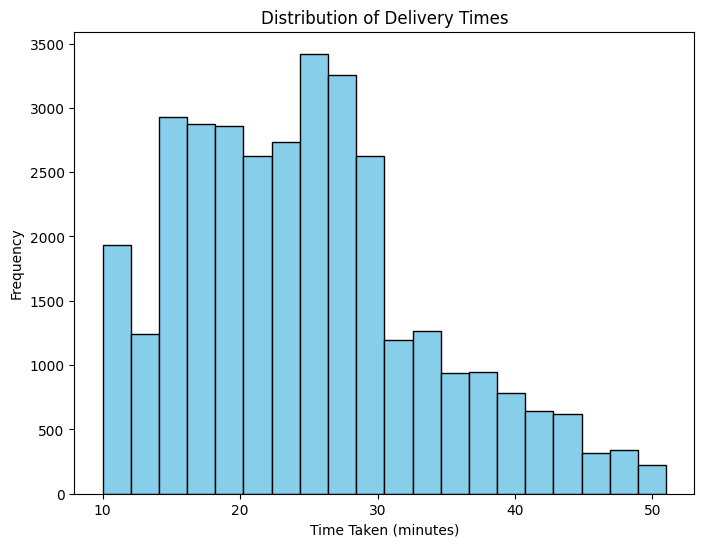

In [39]:
plt.figure(figsize=(8, 6))
plt.hist(df['Time_taken (min)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Delivery Times')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show()

1. Most Common Delivery Time: The most frequent delivery time falls within the 15 to 30-minute range.
 
2. Peak Frequency: The tallest bar corresponds to a delivery time of 20 minutes, indicating that this is the most common duration.
   
3. Decreasing Frequencies: As delivery times increase beyond 30 minutes or decrease below 15 minutes, the frequency of occurrence decreases.


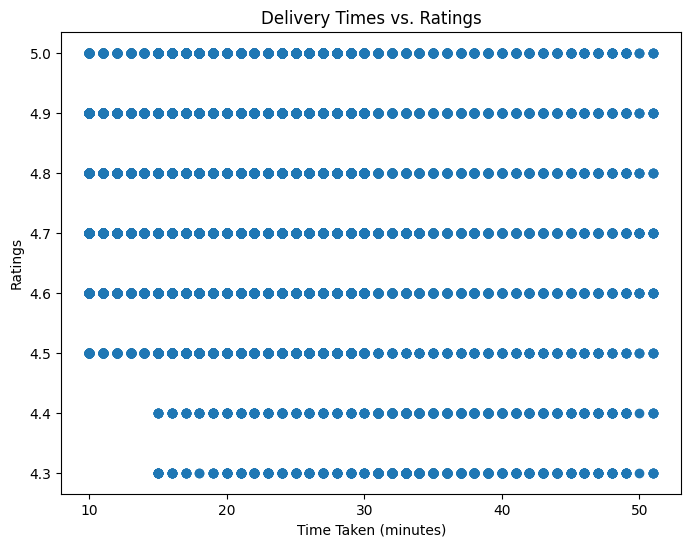

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Time_taken (min)'], df['Delivery_person_Ratings'])
plt.title('Delivery Times vs. Ratings')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Ratings')
plt.show()

<Figure size 800x600 with 0 Axes>

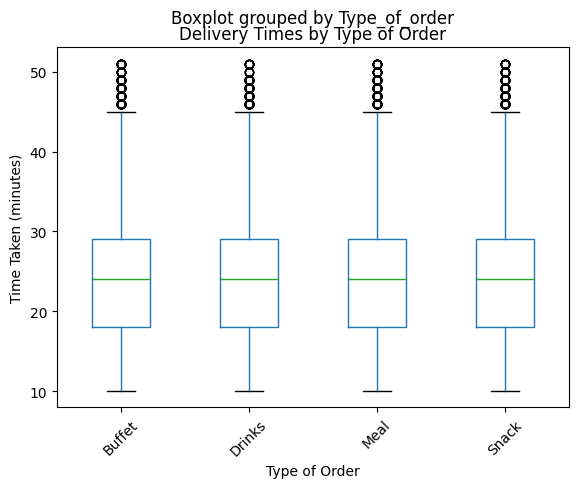

In [41]:
plt.figure(figsize=(8, 6))
df.boxplot(column='Time_taken (min)', by='Type_of_order', grid=False)
plt.title('Delivery Times by Type of Order')
plt.xlabel('Type of Order')
plt.ylabel('Time Taken (minutes)')
plt.xticks(rotation=45)
plt.show()

1. Variability Across Types of Orders:
   
                The boxplots reveal the distribution of delivery times for different types of orders: Buffet, Drinks, Meal, and Snack.
                Buffet orders exhibit the widest range of delivery times, with some outliers indicating exceptionally long or short delivery
                durations.
                Drinks and Meal orders have relatively consistent delivery times, as indicated by the compact boxes.
                Snack orders also show moderate variability, with a few outliers.

2. Central Tendency:
   
         The median delivery time (indicated by the horizontal line inside each box) provides an estimate of the typical duration for each type of                    order.  
              Buffet: Median around 30 minutes
              Drinks: Median around 25 minutes
              Meal: Median around 22 minutes
              Snack: Median around 20 minutes

3. Outliers:
   
          Outliers (represented by dots above the upper whiskers) suggest extreme delivery times that deviate significantly from the norm.
          Investigate these outliers to understand any exceptional circumstances or anomalies.

4. Customer Ratings:

          The graph does not directly show ratings, but we can infer that delivery times do not exhibit a strong correlation with ratings.
           High ratings can occur across a wide range of delivery times, emphasizing the importance of other factors (e.g., food quality, presentation,             customer service).

5. Recommendations:

               Consider optimizing delivery times for Buffet orders to reduce variability.
               Monitor outliers and address any issues causing exceptionally long or short delivery durations.
               Collect additional data on customer satisfaction to explore the relationship between delivery times and ratings.

# DELIVERY_ROUTE-OPTIMIZATION

In [42]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

weather_encoder = LabelEncoder()
df['Weather_conditions_encoded'] = weather_encoder.fit_transform(df['Weather_conditions'])
df['Road_traffic_density_encoded'] = weather_encoder.fit_transform(df['Road_traffic_density'])



X = df[['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Road_traffic_density_encoded', 'Weather_conditions_encoded']]
y = df['Time_taken (min)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)



Mean Squared Error: 54.061342369463894


# DELIVERY-PERSON-PERFORMANCE-ANALYSIS

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


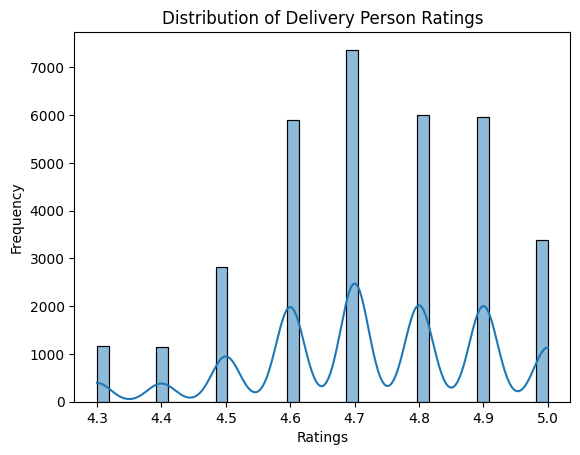

In [45]:
#bution of delivery person ratings
sns.histplot(df['Delivery_person_Ratings'], kde=True)
plt.title('Distribution of Delivery Person Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

Distribution of Delivery Person Ratings:

1. The histogram displays the distribution of delivery person ratings.
2. The x-axis represents the ratings, ranging from approximately 4.3 to 5.0.
4. The y-axis shows the frequency of each rating.
5. Most ratings appear to be concentrated around a specific range, with a peak in the middle.


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


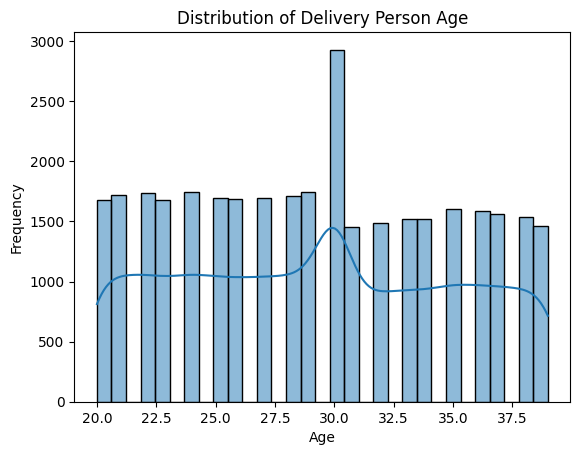

In [46]:
# Distribution of delivery person age
sns.histplot(df['Delivery_person_Age'], kde=True)
plt.title('Distribution of Delivery Person Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Distribution of Delivery Person Ratings:

1. The histogram displays the distribution of delivery person ratings.
2. The x-axis represents the ratings, ranging from approximately 4.3 to 5.0.
3. The y-axis shows the frequency of each rating.
4. Most ratings appear to be concentrated around a specific range, with a peak in the middle.

In [47]:
# Correlation Analysis
correlation = df[['Delivery_person_Ratings', 'Delivery_person_Age']].corr()
print("Correlation between Ratings and Age:\n", correlation)

Correlation between Ratings and Age:
                          Delivery_person_Ratings  Delivery_person_Age
Delivery_person_Ratings                 1.000000            -0.059296
Delivery_person_Age                    -0.059296             1.000000


The correlation between delivery person ratings and age is approximately -0.059, indicating a weak negative correlation.
This suggests that there is a slight tendency for younger delivery persons to have slightly higher ratings,
but the relationship is not very strong.

In [48]:
# Performance Metrics
# For simplicity, let's assume delivery efficiency is measured by Time_taken (min)
delivery_efficiency = df.groupby('Delivery_person_ID')['Time_taken (min)'].mean()
delivery_efficiency

Delivery_person_ID
AGRRES010DEL01    25.230769
AGRRES010DEL02    28.642857
AGRRES010DEL03    25.181818
AGRRES01DEL01     25.000000
AGRRES01DEL02     24.428571
                    ...    
VADRES19DEL02     26.018519
VADRES19DEL03     24.882353
VADRES20DEL01     25.730769
VADRES20DEL02     24.023256
VADRES20DEL03     24.533333
Name: Time_taken (min), Length: 1088, dtype: float64

In [49]:
# Regression Analysis
X = df[['Delivery_person_Ratings', 'Delivery_person_Age']]
y = df['Time_taken (min)']

model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
mse = mean_squared_error(y, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 68.3480533142784


The mean squared error (MSE) of your regression model is approximately 68.35. This metric quantifies the average squared difference between the actual delivery time and the predicted delivery time based on the features (delivery person ratings and age). Lower MSE values indicate better model performance

In [50]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("Feature Importance:\n", coefficients)

Feature Importance:
                    Feature  Coefficient
0  Delivery_person_Ratings    -6.840871
1      Delivery_person_Age     0.419379


1.  Delivery Person Ratings (Feature Importance):

         The coefficient for Delivery Person Ratings is approximately -6.84.
         A negative coefficient suggests that as the delivery person’s ratings increase, the time taken for deliveries tends to decrease.
         In other words, higher ratings are associated with more efficient deliveries.

    

1. Delivery Person Age (Feature Importance):
   
       The coefficient for Delivery Person Age is approximately 0.42.
       A positive coefficient indicates that as the delivery person’s age increases, the time taken for deliveries also tends to increase slightly.
       However, the impact of age on delivery time is relatively small compared to ratings.

In [51]:
top_performers = delivery_efficiency.nsmallest(5)
print("Top Performing Delivery Persons:\n", top_performers)

Top Performing Delivery Persons:
 Delivery_person_ID
LUDHRES18DEL02      16.000000
DEHRES17DEL01       17.363636
RANCHIRES17DEL01    17.625000
KOCRES04DEL02       18.100000
RANCHIRES04DEL02    18.363636
Name: Time_taken (min), dtype: float64


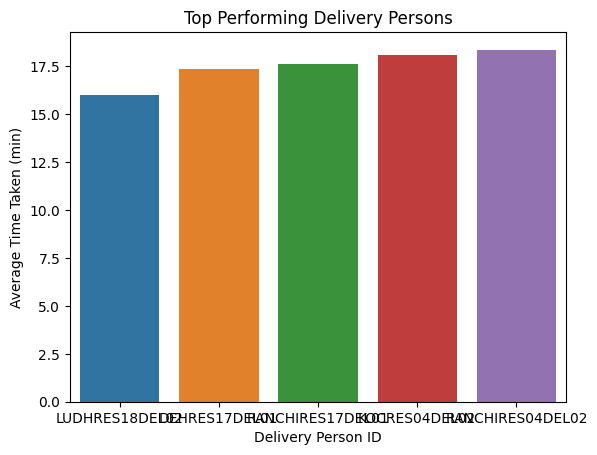

In [52]:
sns.barplot(x=top_performers.index, y=top_performers.values)
plt.title('Top Performing Delivery Persons')
plt.xlabel('Delivery Person ID')
plt.ylabel('Average Time Taken (min)')
plt.show()

# VEHICLE CONDION ANALYSIS

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


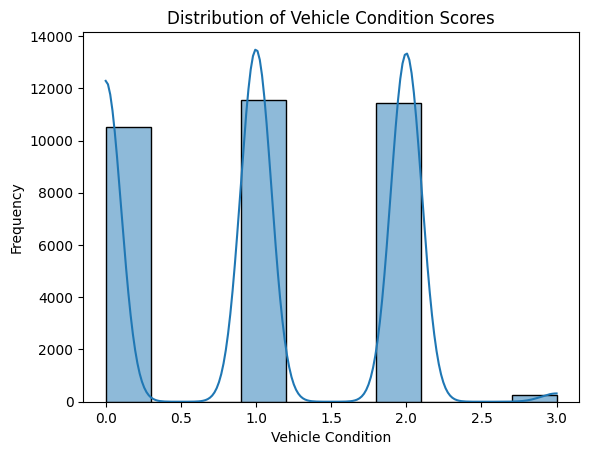

In [54]:
sns.histplot(df['Vehicle_condition'], bins=10, kde=True)
plt.title('Distribution of Vehicle Condition Scores')
plt.xlabel('Vehicle Condition')
plt.ylabel('Frequency')
plt.show()

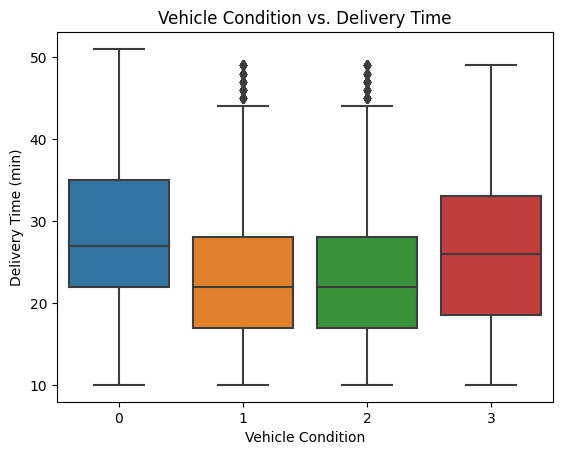

In [55]:
sns.boxplot(x='Vehicle_condition', y='Time_taken (min)', data=df)
plt.title('Vehicle Condition vs. Delivery Time')
plt.xlabel('Vehicle Condition')
plt.ylabel('Delivery Time (min)')
plt.show()

Distribution of Vehicle Condition Scores:

1. The histogram displays the distribution of vehicle condition scores.
2. The x-axis represents the vehicle condition, ranging from 0 to 3.
3. The y-axis shows the frequency of each score.
4. Most scores seem to be concentrated within a certain range.

Relationship Between Vehicle Condition and Delivery Times:

1. The box plot illustrates how delivery times vary across different vehicle conditions.
2. It provides insights into whether vehicle condition affects delivery efficiency.

In [56]:
vehicle_condition_stats = df.groupby('Vehicle_condition')['Time_taken (min)'].describe()
print(vehicle_condition_stats)

                     count       mean       std   min   25%   50%   75%   max
Vehicle_condition                                                            
0                  10517.0  28.815156  8.936064  10.0  22.0  27.0  35.0  51.0
1                  11552.0  22.992382  7.991009  10.0  17.0  22.0  28.0  49.0
2                  11425.0  23.014267  7.904436  10.0  17.0  22.0  28.0  49.0
3                    271.0  26.025830  9.013327  10.0  18.5  26.0  33.0  49.0


In [58]:
correlation = df['Vehicle_condition'].corr(df['Time_taken (min)'])
print("Correlation coefficient between vehicle condition and delivery time:", correlation)

Correlation coefficient between vehicle condition and delivery time: -0.2559365518606641


The correlation coefficient between vehicle condition and delivery time is approximately -0.26. This value 
suggests a weak negative correlation between these two variables.

Here’s what it means:

1. As vehicle condition improves (higher condition scores), delivery times tend to decrease slightly.
2. However, the correlation is not very strong, indicating that other factors may also influence delivery times.

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[['Vehicle_condition']]
y = df['Time_taken (min)']

In [60]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 72.17303741690172


In [61]:
maintenance_issues = df.groupby('Vehicle_condition').size()
print("Maintenance Issues by Vehicle Condition:")
print(maintenance_issues)

Maintenance Issues by Vehicle Condition:
Vehicle_condition
0    10517
1    11552
2    11425
3      271
dtype: int64


count of maintenance issues by vehicle condition:

1. Vehicle Condition 0: 10517 issues
2. Vehicle Condition 1: 11552 issues
3. Vehicle Condition 2: 11425 issues
4. Vehicle Condition 3: 271 issues

Based on the analysis:

1. Vehicles with low condition scores (Condition 3) may require proactive maintenance to improve delivery efficiency.
2. Regular vehicle maintenance and inspections are crucial to prevent unexpected breakdowns and ensure timely deliveries.